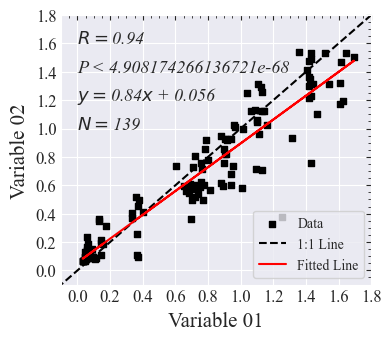

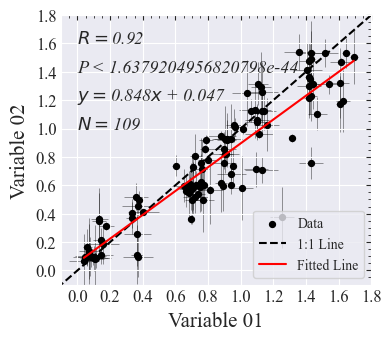

In [1]:
# 正负相关的散点图
# 此代码为使用Python-Prolot包进行学术风格图表绘制，绘图语法和Matplotlib有所不同，需注意。

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置字体为Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
# 设置坐标轴线宽
plt.rcParams["axes.linewidth"] = .8
# 设置坐标轴标签字体大小
plt.rcParams["axes.labelsize"] = 15
# 显示x轴和y轴的小刻度
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
# 设置x轴和y轴刻度方向为内向
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
# 设置x轴和y轴刻度标签字体大小
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
# 显示x轴和y轴的顶部和右侧刻度
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

#数据文件路径
file_path=r".\第4章 双变量图形的绘制\散点图样例数据2.xlsx"
save_path_pdf='.\第4章 双变量图形的绘制\图4-2-11 相关性（误差）散点图完善绘制示例_a.pdf'
save_path_png='.\第4章 双变量图形的绘制\图4-2-11 相关性（误差）散点图完善绘制示例_a.png'
xlabel="Variable 01"
ylabel="Variable 02"
# a）Matplotlib 相关性散点图完善示例
from scipy import stats
scatter_data = pd.read_excel(file_path)
#提取数据列
x = scatter_data["values"]
y = scatter_data["pred values"]
z = scatter_data["3_value"].values

# 这段代码使用 scipy.stats 模块中的 linregress 函数来执行线性回归分析。具体来说，它计算了以下几个值：
# slope: 回归线的斜率。
# intercept: 回归线的截距。
# r_value: 相关系数，表示变量之间的线性关系强度。
# p_value: 用于检验斜率是否显著不为零的 p 值。
# std_err: 斜率的标准误差。
# 这些值用于描述和评估两个变量 x 和 y 之间的线性关系。
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope, intercept, r_value, p_value, std_err

#绘制最佳拟合线
best_line_x = np.linspace(-10,10)
best_line_y=best_line_x
#绘制拟合线
y3 = slope*x + intercept

fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
scatter = ax.scatter(x=x,y=y,edgecolor=None, c='k', s=13,marker='s',label="Data")
bestline = ax.plot(best_line_x,best_line_y,color='k',linewidth=1.5,linestyle='--',label="1:1 Line")
linreg = ax.plot(x,y3,color='r',linewidth=1.5,linestyle='-',label="Fitted Line")
ax.set_xlim((-.1, 1.8))
ax.set_ylim((-.1, 1.8))
ax.set_xticks(np.arange(0, 2, step=0.2))
ax.set_yticks(np.arange(0, 2, step=0.2))

# 添加文本信息
fontdict = {"size":13,"fontstyle":"italic"}
ax.text(0.,1.6,r'$R=$'+str(round(r_value,2)),fontdict=fontdict)
ax.text(0.,1.4,"P < "+str(p_value),fontdict=fontdict)
ax.text(0.,1.2,r'$y=$'+str(round(slope,3))+'$x$'+" + "+str(round(intercept,3)),fontdict=fontdict)
ax.text(0.,1.0,r'$N=$'+ str(len(x)),fontdict=fontdict)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.legend(loc="lower right")

fig.savefig(save_path_pdf,bbox_inches='tight')
fig.savefig(save_path_png,bbox_inches='tight',dpi=300)
plt.show()



file_path=r".\第4章 双变量图形的绘制\散点图样例数据2.xlsx"
save_path_pdf='.\第4章 双变量图形的绘制\图4-2-11 相关性（误差）散点图完善绘制示例_b.pdf'
save_path_png='.\第4章 双变量图形的绘制\图4-2-11 相关性（误差）散点图完善绘制示例_b.png'
xlabel="Variable 01"
ylabel="Variable 02"
#读取数据文件
data_err = pd.read_excel(file_path,sheet_name="data02")
x = data_err["values"]
y = data_err["pred values"]
#绘制最佳拟合线
best_line_x = np.linspace(-10,10)
best_line_y=best_line_x
#绘制拟合线
y3 = slope*x + intercept
x = data_err["values"]
y = data_err["pred values"]
x_err = data_err["x_error"]
y_err = data_err["y_error"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#开始绘图
fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
scatter = ax.scatter(x=x,y=y,edgecolor=None, c='k', s=18,label="Data")
bestline = ax.plot(best_line_x,best_line_y,color='k',linewidth=1.5,linestyle='--',label="1:1 Line")
linreg = ax.plot(x,y3,color='r',linewidth=1.5,linestyle='-',label="Fitted Line")
# 添加误差
errorbar = ax.errorbar(x,y,xerr=x_err,yerr=y_err,ecolor="k", elinewidth=.4,capsize=0,alpha=.7,
            linestyle="",mfc="none",mec="none",zorder=-1)

ax.set_xlim((-.1, 1.8))
ax.set_ylim((-.1, 1.8))
ax.set_xticks(np.arange(0, 2, step=0.2))
ax.set_yticks(np.arange(0, 2, step=0.2))

# 添加文本信息
fontdict = {"size":13,"fontstyle":"italic"}
# 在图表上添加文本信息
ax.text(0., 1.6, r'$R=$' + str(round(r_value, 2)), fontdict=fontdict)  # 显示相关系数 R，保留两位小数
ax.text(0., 1.4, "P < " + str(p_value), fontdict=fontdict)  # 显示 p 值，表示统计显著性
ax.text(0., 1.2, r'$y=$' + str(round(slope, 3)) + '$x$' + " + " + str(round(intercept, 3)), fontdict=fontdict)  # 显示线性回归方程 y = mx + b，斜率和截距保留三位小数
ax.text(0., 1.0, r'$N=$' + str(len(x)), fontdict=fontdict)  # 显示样本量 N
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.legend(loc="lower right")

# 保存为pdf和png
fig.savefig(save_path_pdf,bbox_inches='tight')
fig.savefig(save_path_png,
            bbox_inches='tight',dpi=300)
plt.show()


# 气泡图

- 大小
- 颜色

In [2]:

file_path=r".\第5章 多变量图形的绘制\散点图样例数据2.xlsx"
save_path_pdf='.\第5章 多变量图形的绘制\图5-2-3大小、颜色映射的气泡图绘制示例_a.pdf'
save_path_png='.\第5章 多变量图形的绘制\图5-2-3大小、颜色映射的气泡图绘制示例_a.png'
xlabel="Variable 01"
ylabel="Variable 02"


pubble_data = pd.read_excel(file_path,sheet_name="data03")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 导入数据
midwest = pd.read_excel(file_path)

# 预设图像各种信息
large = 22
med = 16
small = 12
params = {'axes.titlesize': large,  # 子图上的标题字体大小
          'legend.fontsize': med,  # 图例的字体大小
          'figure.figsize': (med, small),  # 画布大小
          'axes.labelsize': med,  # 标签的字体大小
          'xtick.labelsize': med,  # x轴标尺的字体大小
          'ytick.labelsize': med,  # y轴标尺的字体大小
          'figure.titlesize': large}  # 整个画布的标题字体大小
plt.rcParams.update(params)  # 设定各种默认属性
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_style('white')  # 设置整体背景风格

# 准备标签列表与颜色列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i / float(len(categories) - 1)) for i in range(len(categories))]

# 布置画布
fig = plt.figure(figsize=(14, 8), dpi=120, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category == category, :]
                , s=midwest.loc[midwest.category == category, 'percasian'] * 500  # 需要对比的属性
                , c=np.array(colors[i]).reshape(1, -1)  # 点的颜色
                , edgecolors=np.array(colors[i]).reshape(1, -1)  # 点的边缘颜色
                , label=str(category)  # 标签
                , alpha=0.7  # 透明度
                , linewidths=.5)  # 点的边缘线的宽度

# 装饰图像
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Bubble Plot Encircling', fontsize=22)

lgnd = plt.legend(fontsize=12)
plt.show() # 显示图像


KeyError: 'category'

# 箱型图